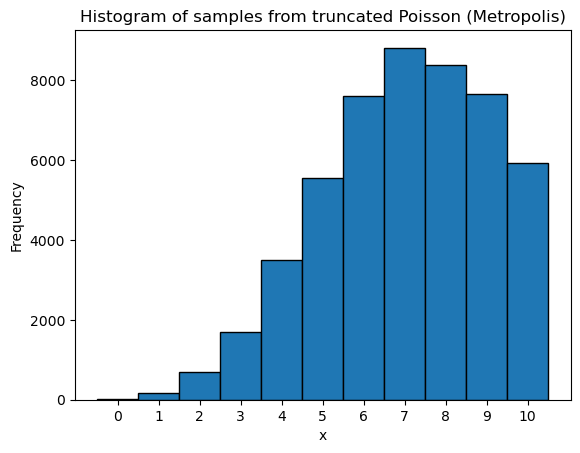

[  20.55818541  164.46548326  657.86193305 1754.29848814 3508.59697629
 5613.75516206 7485.00688275 8554.29358029 8554.29358029 7603.81651581
 6083.05321265]


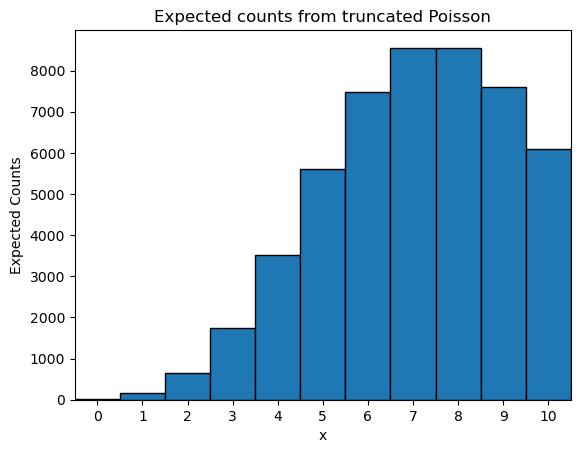

Observed counts from Metropolis samples:
[  21  167  693 1703 3493 5546 7600 8819 8376 7654 5928]
Expected counts:
[  20.55818541  164.46548326  657.86193305 1754.29848814 3508.59697629
 5613.75516206 7485.00688275 8554.29358029 8554.29358029 7603.81651581
 6083.05321265]
Chi2 statistic: 4.6585, p-value: 0.9128
Degrees of freedom: 10


In [7]:
# Markov Chain Monte Carlo

import numpy as np
from scipy.special import factorial
import matplotlib.pyplot as plt

# Proposal distribution h(x,y)

# Uniform distribution around (-delta, delta)

A = 8
m = 10

x_old = np.random.randint(0,m+1)

def g(x):
    x = int(x)
    return A**x / factorial(x)

N_warmup = 10000

# Warm-up phase (do not record samples)
for _ in range(N_warmup):
    #x_new = np.round(x_old + np.random.choice([-1, 1]))
    x_new = np.random.randint(0, m+1)
    while x_new > m or x_new < 0:
        #x_new = np.round(x_old + np.random.choice([-1, 1]))
        x_new = np.random.randint(0, m+1)
    if g(x_new) > g(x_old):
        x_old = x_new
    else:
        p = g(x_new) / g(x_old)
        u = np.random.uniform(0, 1)
        if u < p:
            x_old = x_new


N_iter = 50000
n = 0

x_vect = np.zeros(N_iter)
stride = 5


while n < N_iter:
    
    x_vect[n] = x_old

    #x_new = np.round(x_old + np.random.choice([-1, 1]))
    x_new = np.random.randint(0, m+1)
    while x_new > m or x_new < 0:
        #x_new = np.round(x_old + np.random.choice([-1, 1]))
        x_new = np.random.randint(0, m+1)
   

    if  g(x_new) > g(x_old) :
        x_old = x_new
    else: 
        p = g(x_new) / g(x_old)
        u = np.random.uniform(0,1)

        if u < p: x_old = x_new
    n += 1

classes = np.arange(0,m+1)
x_stride = x_vect[::stride]
obs_counts = np.array([(x_vect == c).sum() for c in classes])
obs_stride = np.array([(x_stride == c).sum() for c in classes])

plt.hist(x_vect, bins=np.arange(-0.5, m+1.5, 1), edgecolor='black')
plt.xticks(np.arange(0, m+1))
plt.xlabel('x')
plt.ylabel('Frequency')
plt.title('Histogram of samples from truncated Poisson (Metropolis)')
plt.show()

# Chi_2 test
from scipy.stats import chisquare

c = sum(A**i/factorial(i) for i in range(0,m+1))

# Sample from the truncated Poisson

p = np.array([A**i/factorial(i) for i in range(0,m+1)]) / c
expected_counts = N_iter * p
expected_counts_test = len(x_stride) * p
print(expected_counts)

# Plot theoretical PMF scaled by sample size (expected counts)
plt.bar(classes, expected_counts, width=1, align='center', edgecolor='black')
plt.xticks(np.arange(0, m+1))
plt.xlabel('x')
plt.ylabel('Expected Counts')
plt.title('Expected counts from truncated Poisson')
plt.xlim([-0.5, m+0.5])
plt.show()

print(f"Observed counts from Metropolis samples:\n{obs_counts}")
print(f"Expected counts:\n{expected_counts}")

# Run chi-square test
chi2_stat, p_value = chisquare(f_obs=obs_stride, f_exp=expected_counts_test)
print(f"Chi2 statistic: {chi2_stat:.4f}, p-value: {p_value:.4f}")
print(f"Degrees of freedom: {len(expected_counts_test) - 1}")

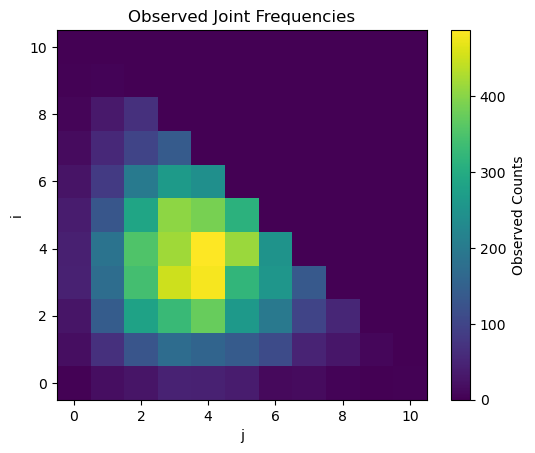

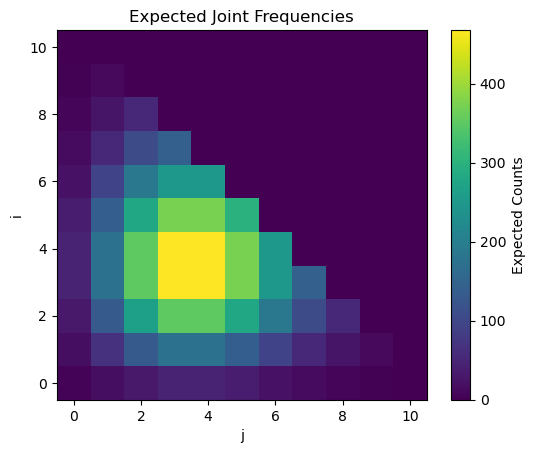

Chi2 statistic: 63.9538, p-value: 0.5134
Degrees of freedom: 65


In [8]:
import numpy as np
from scipy.special import factorial
import matplotlib.pyplot as plt

A1 = 4
A2 = 4
m = 10
N_iter = 50000
stride = 5

def g(x, y):
    x = int(x)
    y = int(y)
    return (A1 ** x / factorial(x)) * (A2 ** y / factorial(y))

ij_acc = 0
while ij_acc == 0:
    x_old = np.random.randint(0, m + 1)
    y_old = np.random.randint(0, m + 1)
    if x_old + y_old <= m:
        ij_acc=1

# Warm-up phase
N_warmup = 10000
for _ in range(N_warmup):
    ij_acc = 0
    while ij_acc == 0:
        x_new = np.random.randint(0, m + 1)
        y_new = np.random.randint(0, m + 1)
        if x_new + y_new <= m:
            ij_acc=1 
    ratio = g(x_new, y_new) / g(x_old, y_old)
    u = np.random.uniform(0,1)
    if u < min(1, ratio):
        x_old, y_old = x_new, y_new

x_vect = np.zeros(N_iter)
y_vect = np.zeros(N_iter)

n = 0
while n < N_iter:
    x_vect[n] = x_old
    y_vect[n] = y_old

    ij_acc = 0
    while ij_acc == 0:
        x_new = np.random.randint(0, m + 1)
        y_new = np.random.randint(0, m + 1)
        if x_new + y_new <= m:
            ij_acc=1
    ratio = g(x_new, y_new) / g(x_old, y_old)
    u = np.random.uniform(0,1)
    if u < min(1, ratio):
        x_old, y_old = x_new, y_new

    n += 1

x_stride = x_vect[::stride]
y_stride = y_vect[::stride]


# Chi_2 test

probs = np.zeros((m+1, m+1))
for i in range(m+1):
    for j in range(m+1):
        if i + j <= m:
            probs[i, j] = A1**i / factorial(i) * A2**j / factorial(j)

c = np.sum(probs)
probs /= c

expected_counts = len(x_stride) * probs
expected_counts_flatten = np.reshape(expected_counts,-1)
expected_counts_flatten = expected_counts_flatten[expected_counts_flatten > 0]

obs_counts = np.zeros((m+1, m+1))


for x, y in zip(x_stride, y_stride):
    if x + y <= m:
        obs_counts[int(x), int(y)] += 1

obs_counts_flatten = np.reshape(obs_counts,-1)
obs_counts_flatten = obs_counts_flatten[obs_counts_flatten > 0]


import matplotlib.pyplot as plt

plt.imshow(obs_counts, origin='lower')
plt.colorbar(label='Observed Counts')
plt.title('Observed Joint Frequencies')
plt.xlabel('j')
plt.ylabel('i')
plt.show()

plt.imshow(expected_counts, origin='lower')
plt.colorbar(label='Expected Counts')
plt.title('Expected Joint Frequencies')
plt.xlabel('j')
plt.ylabel('i')
plt.show()


valid_pairs = [(i, j) for i in range(m+1) for j in range(m+1) if i + j <= m]
obs_flat = np.array([obs_counts[i, j] for (i, j) in valid_pairs])
exp_flat = np.array([expected_counts[i, j] for (i, j) in valid_pairs])
# Run chi-square test
chi2_stat, p_value = chisquare(f_obs=obs_flat, f_exp=exp_flat)
print(f"Chi2 statistic: {chi2_stat:.4f}, p-value: {p_value:.4f}")

print(f"Degrees of freedom: {len(exp_flat) - 1}")




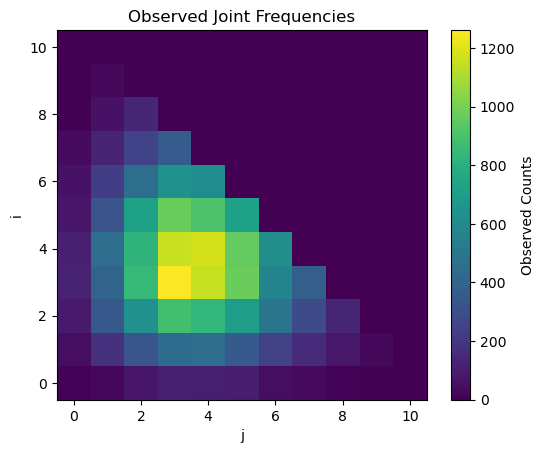

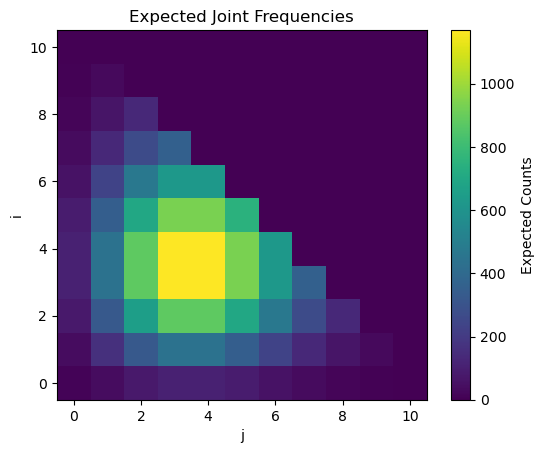

66
Observed: [1.200e+01 2.900e+01 7.500e+01 1.100e+02 1.050e+02 9.600e+01 4.900e+01
 3.200e+01 1.300e+01 7.000e+00 0.000e+00 4.500e+01 1.780e+02 3.310e+02
 4.430e+02 4.500e+02 3.560e+02 2.500e+02 1.480e+02 7.900e+01 2.800e+01
 8.900e+01 3.460e+02 6.390e+02 8.800e+02 8.350e+02 7.060e+02 4.840e+02
 2.950e+02 1.300e+02 1.220e+02 4.070e+02 8.470e+02 1.261e+03 1.149e+03
 9.730e+02 5.680e+02 3.810e+02 1.120e+02 4.530e+02 8.180e+02 1.154e+03
 1.179e+03 9.570e+02 6.220e+02 7.400e+01 3.220e+02 7.220e+02 9.680e+02
 9.070e+02 7.210e+02 6.000e+01 2.360e+02 4.580e+02 6.490e+02 6.150e+02
 3.700e+01 1.260e+02 2.520e+02 3.650e+02 9.000e+00 6.300e+01 1.370e+02
 6.000e+00 2.900e+01 1.000e+00]
Expected: [  10.2790927    41.11637082   82.23274163  109.64365551  109.64365551
   87.71492441   58.47661627   33.4152093    16.70760465    7.42560207
    2.97024083   41.11637082  164.46548326  328.93096653  438.57462204
  438.57462204  350.85969763  233.90646509  133.66083719   66.8304186
   29.70240826   82.232

In [10]:
# Point 2 (b) coordinate wise to sample

import numpy as np
from scipy.special import factorial
import matplotlib.pyplot as plt

A1 = 4
A2 = 4
m = 10
N_iter =50000
stride = 2

def gx(x):
    x = int(x)
    return A1**x / factorial(x)
def gy(y):
    y = int(y)
    return A2**y / factorial(y)

x_old = np.random.randint(0,m+1)
y_old = np.random.randint(0, m - x_old +1)

# Warm-up phase
N_warmup = 10000
for _ in range(N_warmup):
    

    accept = 0
    while accept == 0:
        x_new = np.random.randint(0,m+1)
        #Check if I accept x
        ratio = gx(x_new) / gx(x_old)
        u = np.random.uniform(0,1)
        if u < min(1, ratio):
            x_old =  x_new
        
        # Now move to y
        y_new = np.random.randint(0, m)
        ratio = gy(y_new) / gy(y_old)
        u = np.random.uniform(0,1)
        if u < min(1, ratio):
            y_old = y_new
        if x_old + y_old <= m: accept = 1

       

x_vect = np.zeros(N_iter)
y_vect = np.zeros(N_iter)

n = 0
accepted = 0
while n < N_iter:
    x_vect[n] = x_old
    y_vect[n] = y_old

    

    accept = 0
    while accept == 0:
        x_new = np.random.randint(0,m+1)
        #Check if I accept x
        ratio = gx(x_new) / gx(x_old)
        u = np.random.uniform(0,1)
        if u < min(1, ratio):
            x_old =  x_new
        
        # Now move to y
        y_new = np.random.randint(0, m)
        ratio = gy(y_new) / gy(y_old)
        u = np.random.uniform(0,1)
        if u < min(1, ratio):
            y_old = y_new
        if x_old + y_old <= m: accept = 1

    n += 1


x_stride = x_vect[::stride]
y_stride = y_vect[::stride]


# Chi_2 test

probs = np.zeros((m+1, m+1))
for i in range(m+1):
    for j in range(m+1):
        if i + j <= m:
            probs[i, j] = A1**i / factorial(i) * A2**j / factorial(j)

c = np.sum(probs)
probs /= c


expected_counts = len(x_stride) * probs
expected_counts_flatten = np.reshape(expected_counts,-1)

obs_counts = np.zeros((m+1, m+1))


for x, y in zip(x_stride, y_stride):
    if x + y <= m:
        obs_counts[int(x), int(y)] += 1


obs_counts_flatten = np.reshape(obs_counts,-1)



import matplotlib.pyplot as plt

plt.imshow(obs_counts, origin='lower')
plt.colorbar(label='Observed Counts')
plt.title('Observed Joint Frequencies')
plt.xlabel('j')
plt.ylabel('i')
plt.show()

plt.imshow(expected_counts, origin='lower')
plt.colorbar(label='Expected Counts')
plt.title('Expected Joint Frequencies')
plt.xlabel('j')
plt.ylabel('i')
plt.show()




valid_pairs = [(i, j) for i in range(m+1) for j in range(m+1) if i + j <= m]
obs_flat = np.array([obs_counts[i, j] for (i, j) in valid_pairs])
exp_flat = np.array([expected_counts[i, j] for (i, j) in valid_pairs])

print(len(obs_flat))
print("Observed:", obs_flat)
print("Expected:", exp_flat)
# Run chi-square test
chi2_stat, p_value = chisquare(f_obs=obs_flat, f_exp=exp_flat)
print(f"Chi2 statistic: {chi2_stat:.4f}, p-value: {p_value:.4f}")
print(f"Degrees of freedom: {len(exp_flat) - 1}")

Acceptance rate: 0.0


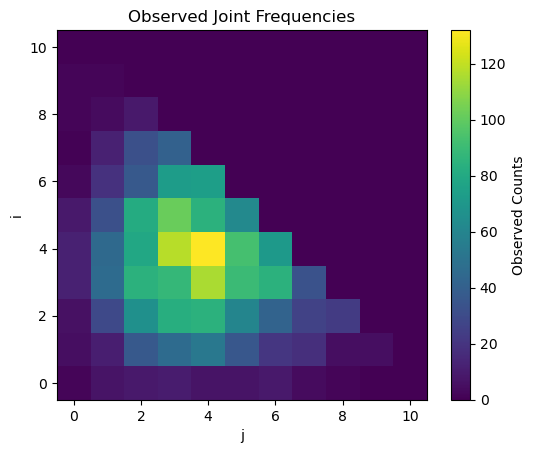

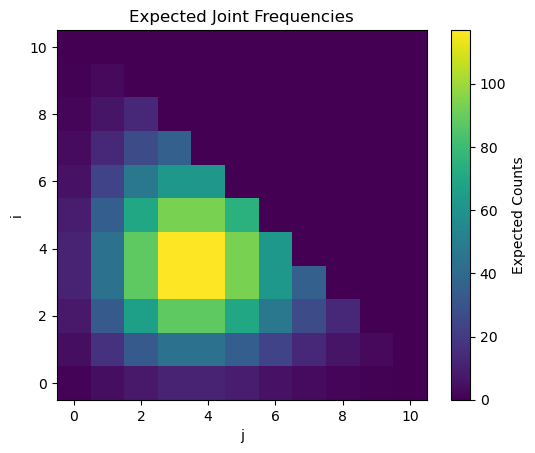

Observed: [  2.   7.   9.  10.   7.   7.   9.   4.   2.   0.   0.   5.  11.  37.
  46.  53.  36.  21.  18.   5.   5.   6.  29.  66.  83.  85.  60.  42.
  26.  23.  12.  46.  85.  88. 115.  90.  85.  33.  12.  45.  79. 118.
 132.  93.  71.   9.  32.  81. 102.  85.  62.   3.  19.  37.  73.  74.
   1.  12.  32.  41.   2.   4.   9.   2.   2.   0.]
Expected: [  1.02790927   4.11163708   8.22327416  10.96436555  10.96436555
   8.77149244   5.84766163   3.34152093   1.67076046   0.74256021
   0.29702408   4.11163708  16.44654833  32.89309665  43.8574622
  43.8574622   35.08596976  23.39064651  13.36608372   6.68304186
   2.97024083   8.22327416  32.89309665  65.78619331  87.71492441
  87.71492441  70.17193953  46.78129302  26.73216744  13.36608372
  10.96436555  43.8574622   87.71492441 116.95323254 116.95323254
  93.56258603  62.37505736  35.64288992  10.96436555  43.8574622
  87.71492441 116.95323254 116.95323254  93.56258603  62.37505736
   8.77149244  35.08596976  70.17193953  93.56258603

In [11]:
# Point 2 (g) Gibbs method

import numpy as np
from scipy.special import factorial
import matplotlib.pyplot as plt

A1 = 4
A2 = 4
m = 10
N_iter =50000
stride = 20

def g(x, y):
    x = int(x)
    y = int(y)
    return (A1 ** x / factorial(x)) * (A2 ** y / factorial(y))

x_old = np.random.randint(0,m+1)
y_old = np.random.randint(0, m - x_old +1)

classes = np.arange(0,m+1)

# Warm-up phase
N_warmup = 10000
for _ in range(N_warmup):
    # To sample x_new, we use the conditional probability of x given y
    # Which is a Poisson, with 0<=i<= m- y
    c = sum(A1**i/factorial(i) for i in range(0,m-y_old +1))

    # Sample from the truncated Poisson

    p = np.array([A1**i/factorial(i) for i in range(0,m-y_old+1)]) / c
    cdf = np.cumsum(p)

    u = np.random.uniform(0,1)
    for i, F in enumerate(cdf):
        if u <= F:
            x_old = classes[i]
            break
    

    # Now we have our x and we can sample y form the conditional of y given x
    c = sum(A2**i/factorial(i) for i in range(0,m-x_old +1))

    # Sample from the truncated Poisson

    p = np.array([A2**i/factorial(i) for i in range(0,m-x_old +1)]) / c
    cdf = np.cumsum(p)

    u = np.random.uniform(0,1)
    for i, F in enumerate(cdf):
        if u <= F:
            y_old = classes[i]
            break
    

x_vect = np.zeros(N_iter)
y_vect = np.zeros(N_iter)

n = 0
accepted = 0
while n < N_iter:
    x_vect[n] = x_old
    y_vect[n] = y_old

    # To sample x_new, we use the conditional probability of x given y
    # Which is a Poisson, with 0<=i<= m- y
    c = sum(A1**i/factorial(i) for i in range(0,m-y_old +1))

    # Sample from the truncated Poisson

    p = np.array([A1**i/factorial(i) for i in range(0,m-y_old+1)]) / c
    cdf = np.cumsum(p)

    u = np.random.uniform(0,1)
    for i, F in enumerate(cdf):
        if u <= F:
            x_old = classes[i]
            break
    

    # Now we have our x and we can sample y form the conditional of y given x
    c = sum(A2**i/factorial(i) for i in range(0,m-x_old +1))

    # Sample from the truncated Poisson

    p = np.array([A2**i/factorial(i) for i in range(0,m-x_old +1)]) / c
    cdf = np.cumsum(p)

    u = np.random.uniform(0,1)
    for i, F in enumerate(cdf):
        if u <= F:
            y_old = classes[i]
            break
    

    n += 1


print("Acceptance rate:", accepted / N_iter)

x_stride = x_vect[::stride]
y_stride = y_vect[::stride]


# Chi_2 test

probs = np.zeros((m+1, m+1))
for i in range(m+1):
    for j in range(m+1):
        if i + j <= m:
            probs[i, j] = A1**i / factorial(i) * A2**j / factorial(j)

c = np.sum(probs)
probs /= c


expected_counts = len(x_stride) * probs
expected_counts_flatten = np.reshape(expected_counts,-1)

obs_counts = np.zeros((m+1, m+1))


for x, y in zip(x_stride, y_stride):
    if x + y <= m:
        obs_counts[int(x), int(y)] += 1


obs_counts_flatten = np.reshape(obs_counts,-1)



import matplotlib.pyplot as plt

plt.imshow(obs_counts, origin='lower')
plt.colorbar(label='Observed Counts')
plt.title('Observed Joint Frequencies')
plt.xlabel('j')
plt.ylabel('i')
plt.show()

plt.imshow(expected_counts, origin='lower')
plt.colorbar(label='Expected Counts')
plt.title('Expected Joint Frequencies')
plt.xlabel('j')
plt.ylabel('i')
plt.show()




valid_pairs = [(i, j) for i in range(m+1) for j in range(m+1) if i + j <= m]
obs_flat = np.array([obs_counts[i, j] for (i, j) in valid_pairs])
exp_flat = np.array([expected_counts[i, j] for (i, j) in valid_pairs])


print("Observed:", obs_flat)
print("Expected:", exp_flat)
# Run chi-square test
chi2_stat, p_value = chisquare(f_obs=obs_flat, f_exp=exp_flat)
print(f"Chi2 statistic: {chi2_stat:.4f}, p-value: {p_value:.4f}")

print(f"Degrees of freedom: {len(exp_flat) - 1}")

(ξ, γ) = [-0.84794097 -0.372714  ]
(θ, ψ) = (0.4283, 0.6889)
[ 1.16277569 -0.18093337  0.42124161 -0.2009047   1.17308747  0.35051306
 -0.24062231 -0.71616981  0.87117916  0.58440577]


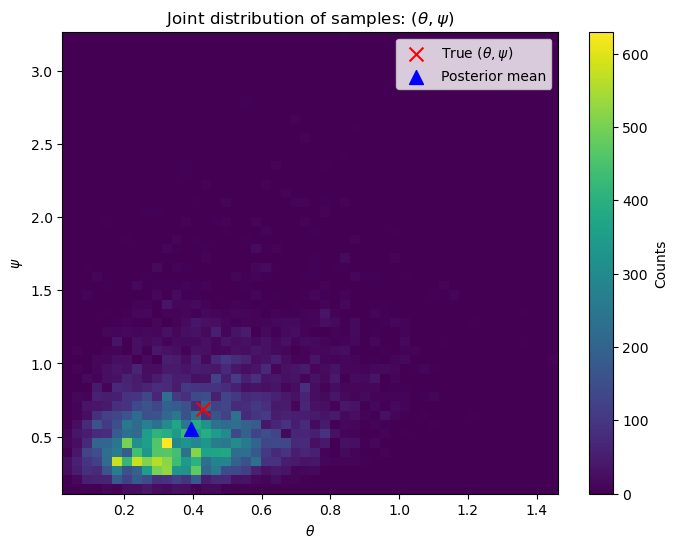

True theta: 0.4283, True psi: 0.6889
Sample mean : 0.3225, Sample variance: 0.4148


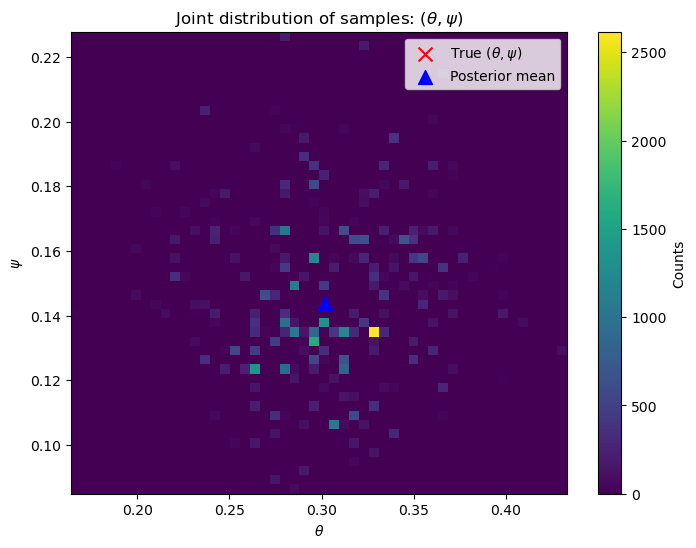

True theta: 0.4283, True psi: 0.6889
Sample mean : 0.3110, Sample variance: 0.1343


C:\Users\Samuele\AppData\Local\Temp\ipykernel_2632\2678191265.py:295: RuntimeWarning: invalid value encountered in scalar divide
  p = g_new / g_old
C:\Users\Samuele\AppData\Local\Temp\ipykernel_2632\2678191265.py:330: RuntimeWarning: invalid value encountered in scalar divide
  p = g_new / g_old


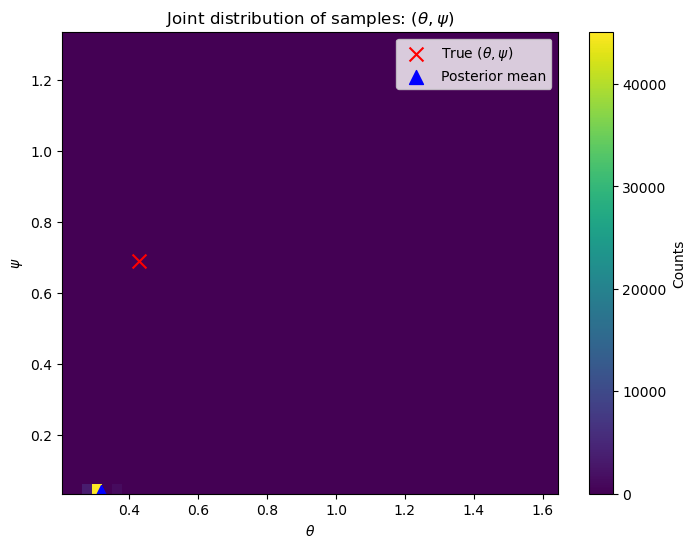

True theta: 0.4283, True psi: 0.6889
Sample mean : 0.3158, Sample variance: 0.0367


In [6]:
 # Exercise 3
from scipy.stats import norm
from scipy.stats import chi2
import numpy as np

rho = 0.5
mean = [0, 0]
cov = [[1, rho], [rho, 1]]

# Sample one (ξ, γ)
xi_gamma = np.random.multivariate_normal(mean, cov)

# Transform to (θ, ψ)
theta_prior,psi_prior = np.exp(xi_gamma[0]), np.exp(xi_gamma[1])

print(f"(ξ, γ) = {xi_gamma}")
print(f"(θ, ψ) = ({theta_prior:.4f}, {psi_prior:.4f})")

n_samples = 10

x = np.random.normal(theta_prior, np.sqrt(psi_prior), size = n_samples)
print(x)
mu = np.mean(x)
sigma_2 = np.var(x, ddof=1)


def g(theta, psi, mu, sigma_2, n):
    if theta <= 0 or psi <= 0:
        return 0

    mean_pdf = norm.pdf(mu, loc=theta, scale=np.sqrt(psi / n))

    df = n - 1
    z = (df * sigma_2) / psi
    variance_pdf = chi2.pdf(z, df=df) * (df / psi)

    log_theta = np.log(theta)
    log_psi = np.log(psi)

    denominator = 2 * np.pi * theta * psi * np.sqrt(1 - rho**2)
    exponent = -(log_theta**2 - 2 * rho * log_theta * log_psi + log_psi**2) / (2 * (1 - rho**2))
    prior = (1 / denominator) * np.exp(exponent)

    return mean_pdf * variance_pdf * prior

while True:
    theta=  np.random.normal(0, 1)
    if theta > 0: break
while True:
    psi=  np.random.normal(0, 1)
    if psi > 0: break
    
N_warmup = 1000
while True:
    theta_new= theta + np.random.normal(0, 1)
    if theta_new > 0: break

while True:
    psi_new= psi + np.random.normal(0, 1)
    if psi_new > 0: break


for _ in range(N_warmup):
    
    while True:
        theta_new= theta + np.random.normal(0, 1)
        if theta_new > 0: break

    while True:
        psi_new= psi + np.random.normal(0, 1)
        if psi_new > 0: break
            

    g_old = g(theta, psi, mu, sigma_2, n_samples)
    g_new = g(theta_new, psi_new, mu, sigma_2, n_samples)

    if g_new > g_old:
        theta, psi = theta_new, psi_new
    else:
        p = g_new / g_old 
        u = np.random.uniform(0, 1)
        if u < p:
            theta, psi = theta_new, psi_new


N_iter = 50000
n = 0

theta_vect = np.zeros(N_iter)
psi_vect = np.zeros(N_iter)
stride = 5


while n < N_iter:
    
    theta_vect[n] = theta
    psi_vect[n] = psi

    while True:
        theta_new= theta + np.random.normal(0, 1)
        if theta_new > 0: break

    while True:
        psi_new= psi + np.random.normal(0, 1)
        if psi_new > 0: break

    g_old = g(theta, psi, mu, sigma_2, n_samples)
    g_new = g(theta_new, psi_new, mu, sigma_2, n_samples)
    #print(g_old)
    #print(g_new)

    if g_new > g_old:
        theta, psi = theta_new, psi_new
    else:
        p = g_new / g_old 
        u = np.random.uniform(0, 1)
        if u < p:
            theta, psi = theta_new, psi_new
    n += 1

theta_post_mean = np.mean(theta_vect)
psi_post_mean = np.mean(psi_vect)


import matplotlib.pyplot as plt

# Plot 2D histogram with true values and estimates
plt.figure(figsize=(8, 6))
plt.hist2d(theta_vect, psi_vect, bins=50, cmap='viridis')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\psi$')
plt.title('Joint distribution of samples: $(\\theta, \\psi)$')
plt.colorbar(label='Counts')

# Plot the true values (from initial sample)
plt.scatter([theta_prior], [psi_prior], color='red', label='True $(\\theta, \\psi)$', marker='x', s=100)

# Plot the sample mean
plt.scatter([theta_post_mean], [psi_post_mean], color='blue', label='Posterior mean', marker='^', s=100)
plt.legend()
plt.show()

print(f"True theta: {theta_prior:.4f}, True psi: {psi_prior:.4f}")
print(f"Sample mean : {mu:.4f}, Sample variance: {sigma_2:.4f}")


## N = 100

n_samples = 100

x = np.random.normal(theta, psi, size = n_samples)
mu = np.mean(x)
sigma_2 = np.var(x, ddof=1)


while True:
    theta=  np.random.normal(0, 1)
    if theta > 0: break
while True:
    psi=  np.random.normal(0, 1)
    if psi > 0: break

N_warmup = 100
while True:
    theta_new= theta + np.random.normal(0, 1)
    if theta_new > 0: break

while True:
    psi_new= psi + np.random.normal(0, 1)
    if psi_new > 0: break


for _ in range(N_warmup):
    
    while True:
        theta_new= theta + np.random.normal(0, 1)
        if theta_new > 0: break

    while True:
        psi_new= psi + np.random.normal(0, 1)
        if psi_new > 0: break
            

    g_old = g(theta, psi, mu, sigma_2, n_samples)
    g_new = g(theta_new, psi_new, mu, sigma_2, n_samples)

    if g_new > g_old:
        theta, psi = theta_new, psi_new
    else:
        p = g_new / g_old 
        u = np.random.uniform(0, 1)
        if u < p:
            theta, psi = theta_new, psi_new


N_iter = 50000
n = 0

theta_vect = np.zeros(N_iter)
psi_vect = np.zeros(N_iter)
stride = 5


while n < N_iter:
    
    theta_vect[n] = theta
    psi_vect[n] = psi

    while True:
        theta_new= theta + np.random.normal(0, 1)
        if theta_new > 0: break

    while True:
        psi_new= psi + np.random.normal(0, 1)
        if psi_new > 0: break

    g_old = g(theta, psi, mu, sigma_2, n_samples)
    g_new = g(theta_new, psi_new, mu, sigma_2, n_samples)
    #print(g_old)
    #print(g_new)

    if g_new > g_old:
        theta, psi = theta_new, psi_new
    else:
        p = g_new / g_old 
        u = np.random.uniform(0, 1)
        if u < p:
            theta, psi = theta_new, psi_new
    n += 1

theta_post_mean = np.mean(theta_vect)
psi_post_mean = np.mean(psi_vect)


import matplotlib.pyplot as plt

# Plot 2D histogram with true values and estimates
plt.figure(figsize=(8, 6))
plt.hist2d(theta_vect, psi_vect, bins=50, cmap='viridis')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\psi$')
plt.title('Joint distribution of samples: $(\\theta, \\psi)$')
plt.colorbar(label='Counts')

# Plot the true values (from initial sample)
plt.scatter([theta_prior], [psi_prior], color='red', label='True $(\\theta, \\psi)$', marker='x', s=100)

# Plot the sample mean
plt.scatter([theta_post_mean], [psi_post_mean], color='blue', label='Posterior mean', marker='^', s=100)
plt.legend()
plt.show()

print(f"True theta: {theta_prior:.4f}, True psi: {psi_prior:.4f}")
print(f"Sample mean : {mu:.4f}, Sample variance: {sigma_2:.4f}")

## N = 1000
n_samples = 1000

x = np.random.normal(theta, psi, size = n_samples)
mu = np.mean(x)
sigma_2 = np.var(x, ddof=1)

while True:
    theta=  np.random.normal(0, 1)
    if theta > 0: break
while True:
    psi=  np.random.normal(0, 1)
    if psi > 0: break
N_warmup = 100
while True:
    theta_new= theta + np.random.normal(0, 1)
    if theta_new > 0: break

while True:
    psi_new= psi + np.random.normal(0, 1)
    if psi_new > 0: break

for _ in range(N_warmup):
    
    while True:
        theta_new= theta + np.random.normal(0, 1)
        if theta_new > 0: break

    while True:
        psi_new= psi + np.random.normal(0, 1)
        if psi_new > 0: break
            

    g_old = g(theta, psi, mu, sigma_2, n_samples)
    g_new = g(theta_new, psi_new, mu, sigma_2, n_samples)

    if g_new > g_old:
        theta, psi = theta_new, psi_new
    else:
        p = g_new / g_old 
        u = np.random.uniform(0, 1)
        if u < p:
            theta, psi = theta_new, psi_new


N_iter = 50000
n = 0

theta_vect = np.zeros(N_iter)
psi_vect = np.zeros(N_iter)
stride = 5


while n < N_iter:
    
    theta_vect[n] = theta
    psi_vect[n] = psi

    while True:
        theta_new= theta + np.random.normal(0, 1)
        if theta_new > 0: break

    while True:
        psi_new= psi + np.random.normal(0, 1)
        if psi_new > 0: break

    g_old = g(theta, psi, mu, sigma_2, n_samples)
    g_new = g(theta_new, psi_new, mu, sigma_2, n_samples)
    #print(g_old)
    #print(g_new)

    if g_new > g_old:
        theta, psi = theta_new, psi_new
    else:
        p = g_new / g_old 
        u = np.random.uniform(0, 1)
        if u < p:
            theta, psi = theta_new, psi_new
    n += 1

theta_post_mean = np.mean(theta_vect)
psi_post_mean = np.mean(psi_vect)


import matplotlib.pyplot as plt

# Plot 2D histogram with true values and estimates
plt.figure(figsize=(8, 6))
plt.hist2d(theta_vect, psi_vect, bins=50, cmap='viridis')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\psi$')
plt.title('Joint distribution of samples: $(\\theta, \\psi)$')
plt.colorbar(label='Counts')

# Plot the true values (from initial sample)
plt.scatter([theta_prior], [psi_prior], color='red', label='True $(\\theta, \\psi)$', marker='x', s=100)

# Plot the sample mean
plt.scatter([theta_post_mean], [psi_post_mean], color='blue', label='Posterior mean', marker='^', s=100)
plt.legend()
plt.show()

print(f"True theta: {theta_prior:.4f}, True psi: {psi_prior:.4f}")
print(f"Sample mean : {mu:.4f}, Sample variance: {sigma_2:.4f}")
